## 🚗 Vendas de automóveis | 📊

### Jennifer Plothow 

In [9]:
#Importar as bibliotecas

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from warnings import filterwarnings
filterwarnings('ignore')


In [18]:
#Carregando o arquivo

df = pd.read_csv('dados/Auto Sales data.csv', parse_dates=['ORDERDATE'], dayfirst=True)


####  Irei remover e criar uma nova linha de base de diferença de dias como 02-06-2020 (1º de junho de 2020)

In [19]:
#Verificando amostras dos dados

df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small


In [20]:
#Dimensões dos dados

df.shape


(2747, 20)

In [21]:
#Vou eliminar os dias desde o último pedido e criar um novo recurso com diferença!
df = df.drop('DAYS_SINCE_LASTORDER', axis=1)


In [23]:
## Criei um nova coluna caucuada com 'DAYS_SINCE_LASTORDER' com base na diferença horária
# Elimina a coluna 'DAYS_SINCE_LASTORDER'
# Crie um novo recurso 'DAYS_SINCE_LASTORDER' com base na diferença horária
from datetime import datetime
temp_date = datetime(2020, 6, 1)
df['DAYS_SINCE_LASTORDER'] = (temp_date- df['ORDERDATE']).dt.days


In [24]:
#verificação da última alteração
df


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,DAYS_SINCE_LASTORDER
0,10107,30,95.70,2,2871.00,2018-02-24,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,828
1,10121,34,81.35,5,2765.90,2018-05-07,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,756
2,10134,41,94.74,2,3884.34,2018-07-01,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,701
3,10145,45,83.26,6,3746.70,2018-08-25,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,646
4,10168,36,96.66,1,3479.76,2018-10-28,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,2019-12-02,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small,182
2743,10373,29,137.19,1,3978.51,2020-01-31,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium,122
2744,10386,43,125.99,4,5417.57,2020-03-01,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium,92
2745,10397,34,62.24,1,2116.16,2020-03-28,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small,65


In [25]:
#Informações sobre o conjunto de dados
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   STATUS                2747 non-null   object        
 7   PRODUCTLINE           2747 non-null   object        
 8   MSRP                  2747 non-null   int64         
 9   PRODUCTCODE           2747 non-null   object        
 10  CUSTOMERNAME          2747 non-null   object        
 11  PHONE                 2747 non-null   object        
 12  ADDRESSLINE1          2747 non-null   object        
 13  CITY              

### Características dos dados

***O conjunto de dados contém 2.747 entradas com 20 colunas.
Todas as colunas têm 2.747 valores não nulos, portanto, nenhuma falta foi encontrada
As colunas principais incluem detalhes da transação de vendas, informações do cliente, detalhes do produto, status do pedido e informações recentes.
Os tipos de dados variam entre colunas, incluindo flutuantes, data e hora e objetos.***


*Recursos numéricos
Como **ORDERNUMBER** não é relevante para o base aqui, irei optar pela análise exploratória de dados e visualizações*

In [27]:
df_num = df.select_dtypes(include=['float64', 'int64']).drop(columns=['ORDERNUMBER'])
print(df_num.columns, len(list(df_num.columns.values)))



Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'MSRP',
       'DAYS_SINCE_LASTORDER'],
      dtype='object') 6


###### Recursos categóricos
###### Não precisamos das colunas abaixo para análise, portanto, excluiremos dos gráficos: 
    'PHONE','ADDRESSLINE1', 'CONTACTLASTNAME','CONTACTFIRSTNAME'

In [28]:
df_cat = df.select_dtypes(include = ['object']).drop(columns=['PHONE','ADDRESSLINE1', 'CONTACTLASTNAME','CONTACTFIRSTNAME'])
print(df_cat.columns, len(list(df_cat.columns.values)))


Index(['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY',
       'POSTALCODE', 'COUNTRY', 'DEALSIZE'],
      dtype='object') 8


### conjunto de dados - características numéricas


In [29]:
display(round(df_num.describe(),2).T)


,count,mean,std,min,25%,50%,75%,max
QUANTITYORDERED,2747.0,35.10,9.76,6.00,27.00,35.00,43.00,97.00
PRICEEACH,2747.0,101.10,42.04,26.88,68.74,95.55,127.10,252.87
ORDERLINENUMBER,2747.0,6.49,4.23,1.00,3.00,6.00,9.00,18.00
SALES,2747.0,3553.05,1838.95,482.13,2204.35,3184.80,4503.09,14082.80
MSRP,2747.0,100.69,40.11,33.00,68.00,99.00,124.00,214.00
DAYS_SINCE_LASTORDER,2747.0,384.09,230.23,1.00,197.00,343.00,571.00,877.00


In [30]:
df.select_dtypes(include = ['object']).describe().T


,count,unique,top,freq
STATUS,2747,6,Shipped,2541
PRODUCTLINE,2747,7,Classic Cars,949
PRODUCTCODE,2747,109,S18_3232,51
CUSTOMERNAME,2747,89,Euro Shopping Channel,259
PHONE,2747,88,(91) 555 94 44,259
ADDRESSLINE1,2747,89,"C/ Moralzarzal, 86",259
CITY,2747,71,Madrid,304
POSTALCODE,2747,73,28034,259
COUNTRY,2747,19,USA,928
CONTACTLASTNAME,2747,76,Freyre,259


### Percepções

*Valor de vendas: O valor médio de vendas por transação é de aproximadamente '3.553'. Os clientes fazem compras que variam de '482,13' a '14.082,80'.
Quantidade encomendada: Em média, os clientes encomendam aproximadamente 35 itens por transação, com mínimo de 6 e máximo de 97 itens.
Preço Cada: O preço médio de cada item de um pedido é de aproximadamente 101. Os preços variam entre um mínimo de 26,88 e um máximo de 252,87.
Preço de varejo sugerido pelo fabricante (MSRP): O MSRP médio é de aproximadamente 00,69, com preços variando de 33 a 214.
Status do pedido: o status do pedido mais comum é “Enviado”, ocorrendo 2.541 vezes.
Linha de Produtos: “Carros Clássicos” é a linha de produtos dominante, com 949 entradas.
Concentração de Clientes: “Euro Shopping Channel” é o principal cliente, com 259 transações.
Tendências Geográficas: “Madrid” e “EUA” são as cidades e países mais frequentes, respetivamente.
Tamanhos dos negócios: A maioria dos negócios se enquadra na categoria “Médio”, respondendo por 1.349 casos.
Valores ausentes*

In [31]:
df.isnull().sum()


ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
DAYS_SINCE_LASTORDER    0
dtype: int64

In [32]:
#checando valores duplicados 

df.duplicated().sum()


0

### Análise Univariada

In [37]:
cat_columns = df[['STATUS', 'PRODUCTLINE', 'DEALSIZE']]
def univariateAnalysis_category(cols):
    print("Distribution of", cols)
    print("_"* 60)
    colors = ['#79a5db', '#e0a580', '#6fab90', '#896ca8', '#ADD8E6']
    value_counts = cat_columns[cols].value_counts()
    
     # Count plot
    fig = px.bar(value_counts,x=value_counts.index, y=value_counts.values, title=f'Distribution of {cols}',
        labels={'x': 'Categories', 'y': 'Count'},color_discrete_sequence=[colors])
    fig.update_layout(width=700)
    fig.update_layout(plot_bgcolor='#ffffff', paper_bgcolor='#ffffff')
    fig.show()
    # Donut chart
    percentage = (value_counts / value_counts.sum()) * 100
    fig = px.pie( values=percentage, names=value_counts.index,
        labels={'names': 'Categories', 'values': 'Percentage'}, hole=0.5,color_discrete_sequence=colors)
    fig.add_annotation( x=0.5, y=0.5, align="center", xref="paper",
        yref="paper", showarrow=False, font_size=15, text=f'{cols}')
    fig.update_layout(legend=dict(x=0.9, y=0.5))
    fig.update_layout(width=700)
    fig.show()
    print("       ")
for x in cat_columns:
    univariateAnalysis_category(x)

   

Distribution of STATUS
____________________________________________________________


       
Distribution of PRODUCTLINE
____________________________________________________________


       
Distribution of DEALSIZE
____________________________________________________________


Description of QUANTITYORDERED
----------------------------------------------------------------------------
count    2747.000000
mean       35.103021
std         9.762135
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


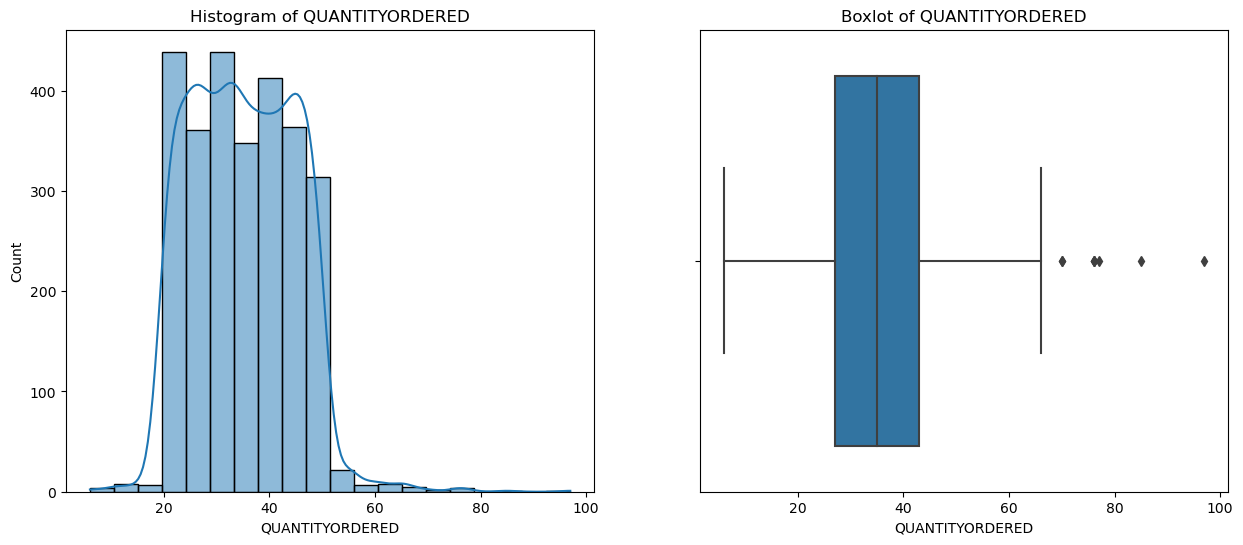

Description of PRICEEACH
----------------------------------------------------------------------------
count    2747.000000
mean      101.098952
std        42.042549
min        26.880000
25%        68.745000
50%        95.550000
75%       127.100000
max       252.870000
Name: PRICEEACH, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


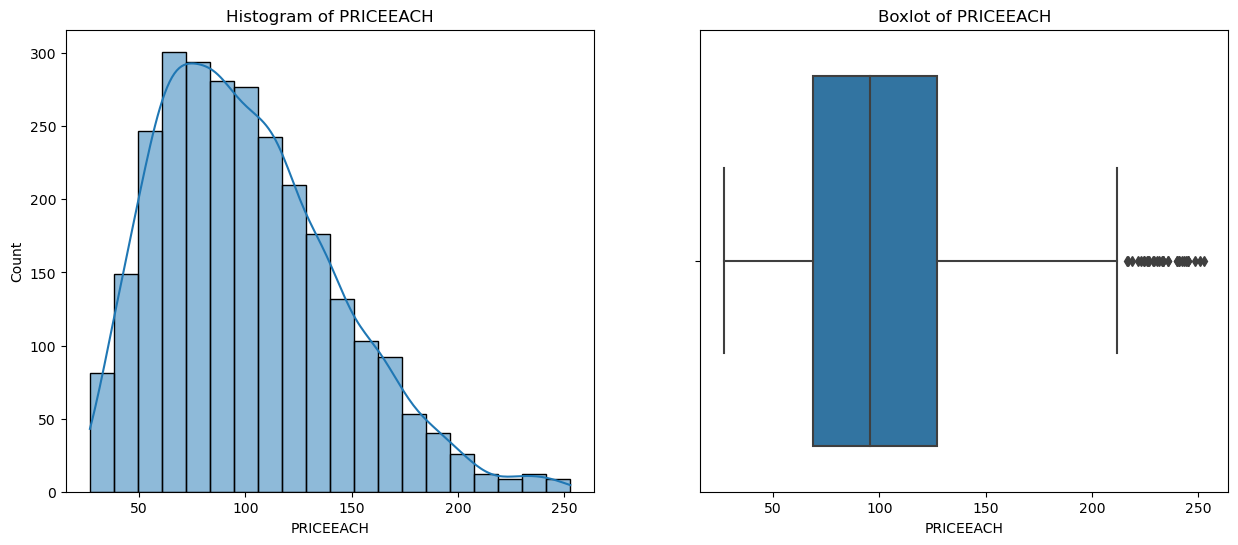

Description of ORDERLINENUMBER
----------------------------------------------------------------------------
count    2747.000000
mean        6.491081
std         4.230544
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        18.000000
Name: ORDERLINENUMBER, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


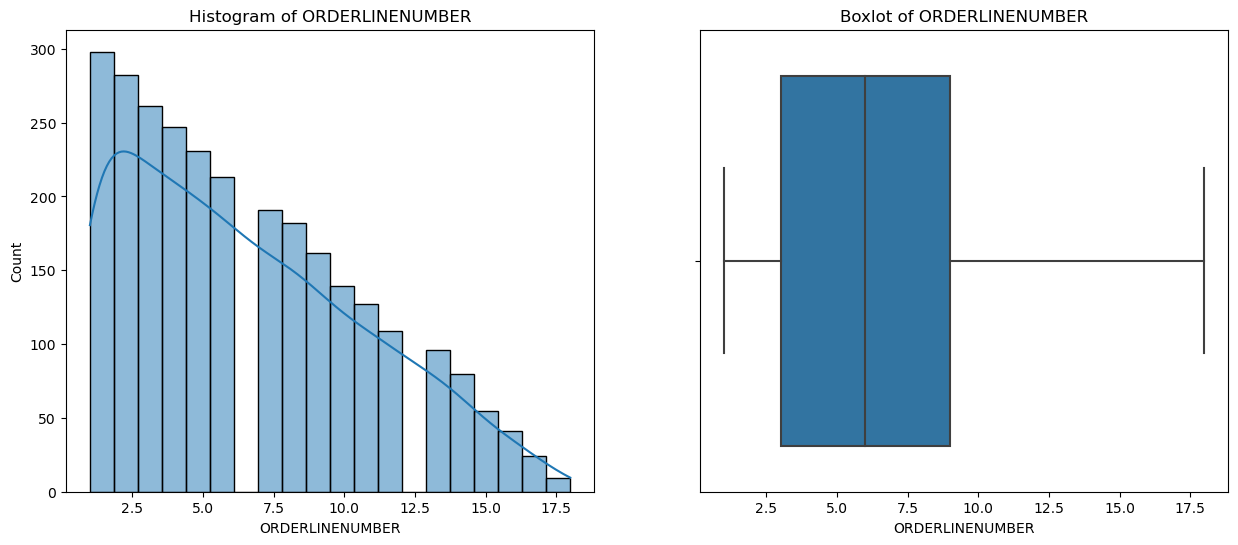

Description of SALES
----------------------------------------------------------------------------
count     2747.000000
mean      3553.047583
std       1838.953901
min        482.130000
25%       2204.350000
50%       3184.800000
75%       4503.095000
max      14082.800000
Name: SALES, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


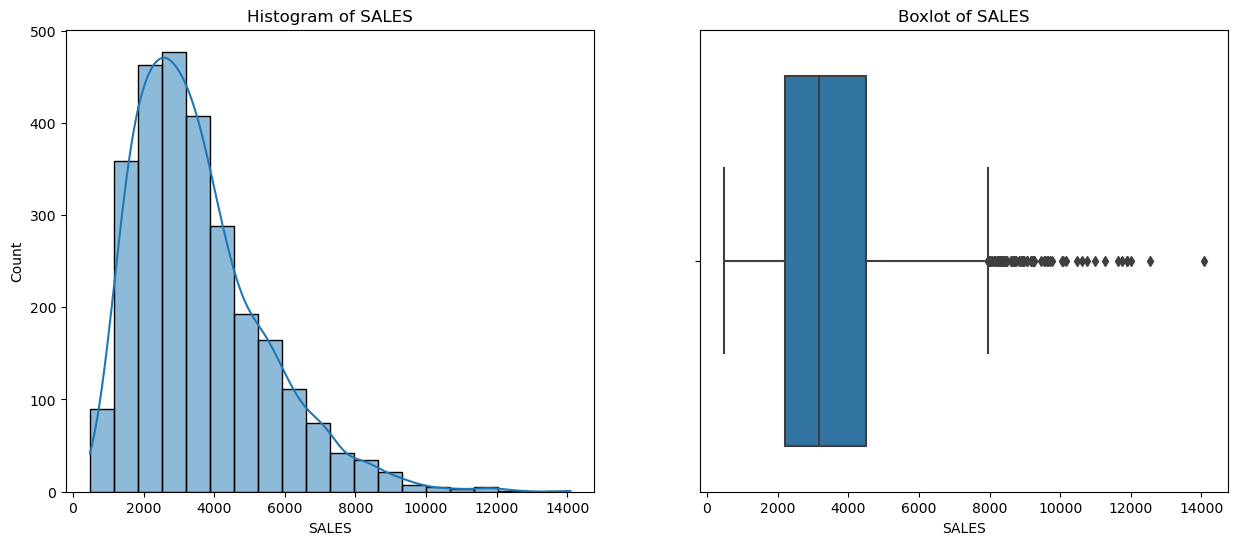

Description of MSRP
----------------------------------------------------------------------------
count    2747.000000
mean      100.691664
std        40.114802
min        33.000000
25%        68.000000
50%        99.000000
75%       124.000000
max       214.000000
Name: MSRP, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


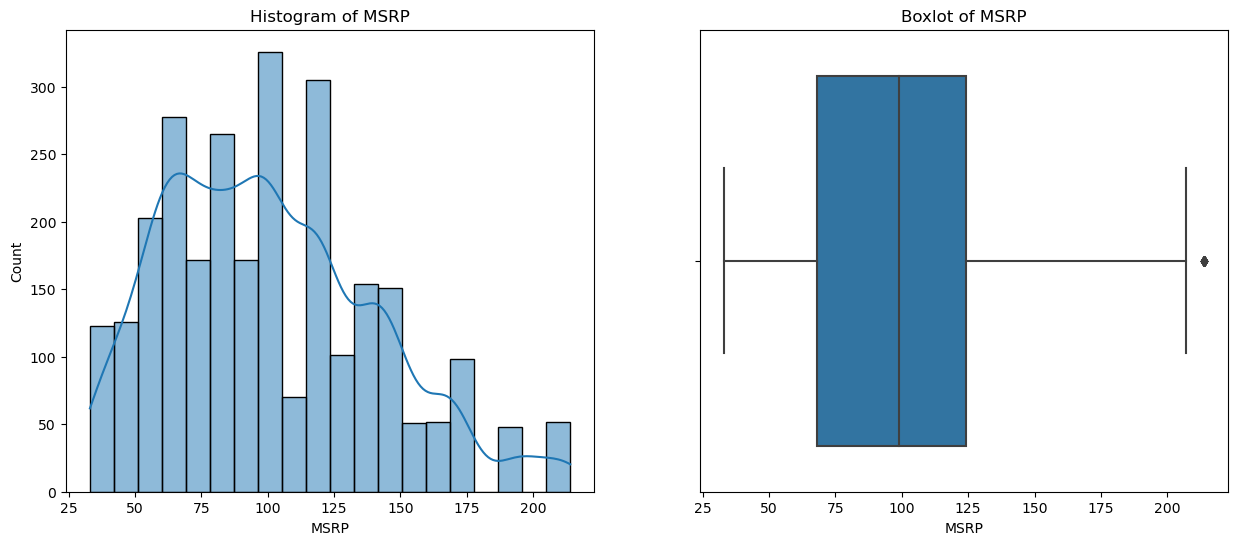

Description of DAYS_SINCE_LASTORDER
----------------------------------------------------------------------------
count    2747.000000
mean      384.085912
std       230.231295
min         1.000000
25%       197.000000
50%       343.000000
75%       571.000000
max       877.000000
Name: DAYS_SINCE_LASTORDER, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


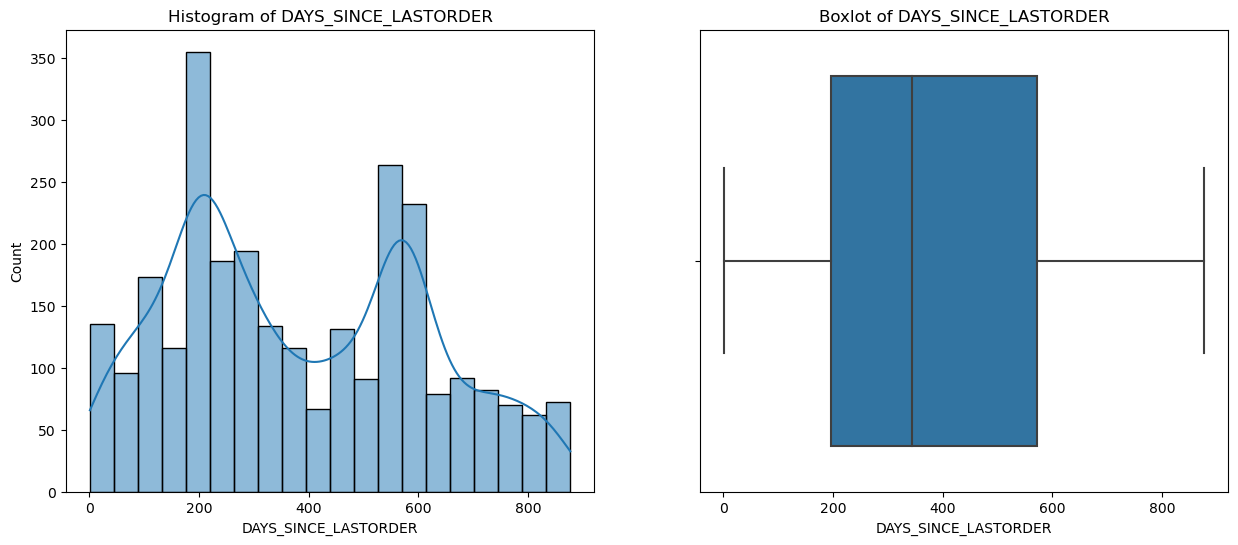

In [38]:
 def univariateAnalysis_numeric(column, nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(), end=' ')
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    # Plot histogram
    print("----------------------------------------------------------------------------")
    sns.histplot(df[column], bins=nbins, kde=True, ax=axes[0])
    axes[0].set_title("Histogram of " + column)
    # Plot violin plot
    print("----------------------------------------------------------------------------")
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title("Boxlot of " + column )
    plt.show()
for x in df_num:
    univariateAnalysis_numeric(x,20)


In [39]:
#Top 10 paises
country_counts = df['COUNTRY'].value_counts()[:10]
fig = go.Figure(go.Funnel(y=country_counts.index,
    x=country_counts.values, textinfo='value', marker={'color': px.colors.sequential.Blues_r}))
fig.update_layout(title_text='Top 10 Country Distribution',  template='plotly_white')
fig.show()

In [40]:
#Top 10 cidades

city_counts = df['CITY'].value_counts()[:10]
fig = go.Figure(go.Funnel(    y=city_counts.index,
    x=city_counts.values,      textinfo='value',
    marker={'color': px.colors.sequential.Blues_r} ))
fig.update_layout(title_text='Top 10 City Distribution', template='plotly_white')
fig.show()

In [41]:
#Top 10 Clientes
top10customer = df.sort_values(by="SALES", ascending = False).head(5)
top10customer = df['CUSTOMERNAME'].value_counts()[:10]
fig = go.Figure(go.Funnel(  y=top10customer.index, x=top10customer.values,
    textinfo='value', marker={'color': px.colors.sequential.Blues_r}))
fig.update_layout(title_text='Top 10 Customer Distribution', template='plotly_white')
fig.show()

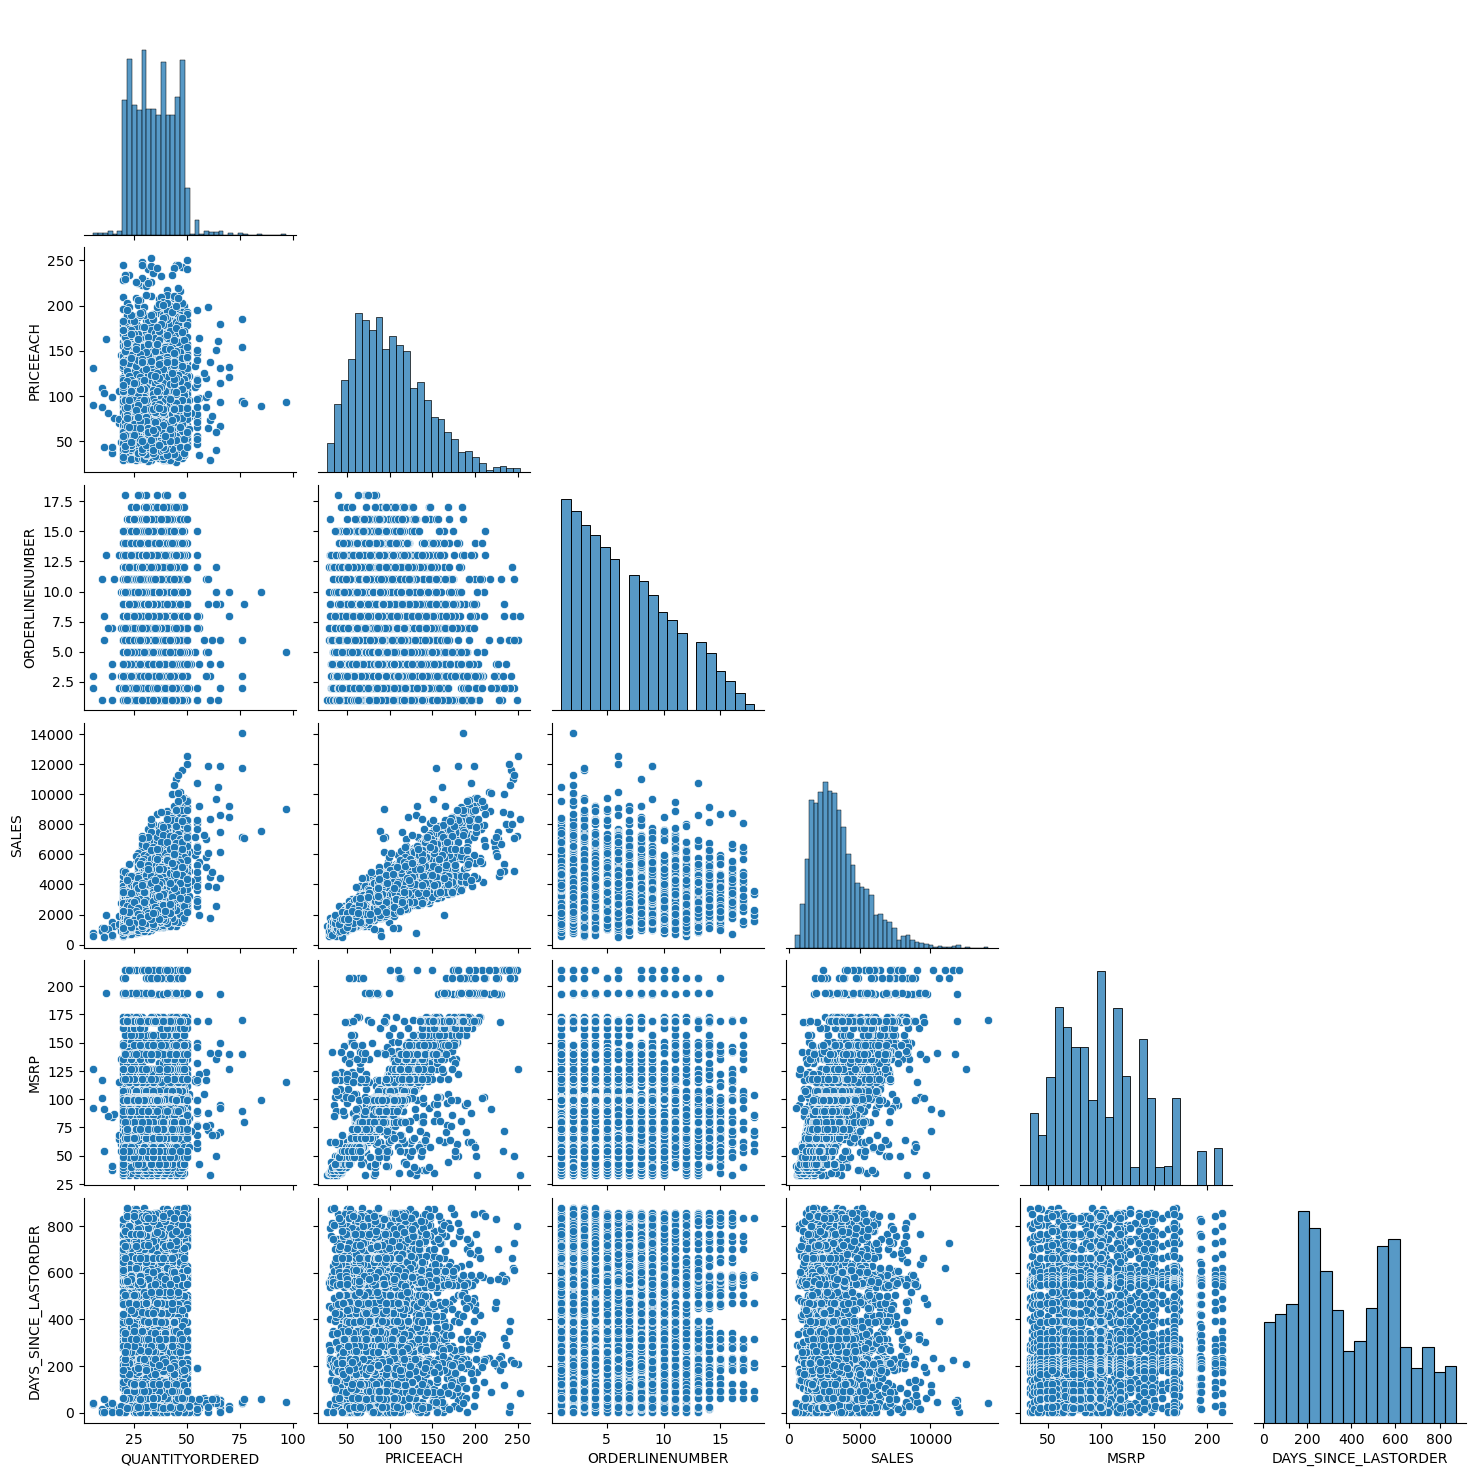

In [42]:
sns.pairplot(data=df_num, corner = True )


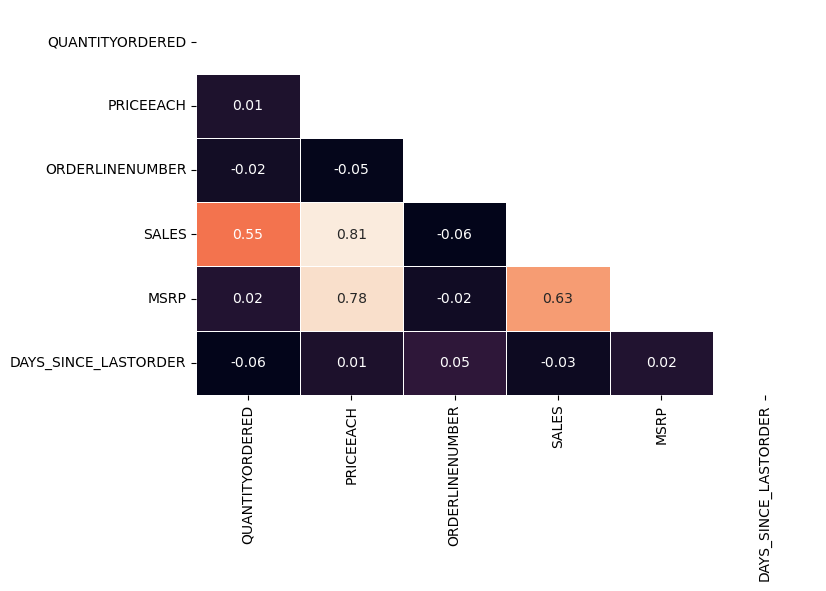

In [43]:
corr = df_num.corr(method='pearson')
mask = np.triu(np.ones_like(corr))
fig = plt.subplots(figsize=(8, 5))
sns.heatmap(corr, annot=True,fmt='.2f',mask=mask, cbar=None, linewidth=0.5)
plt.show()


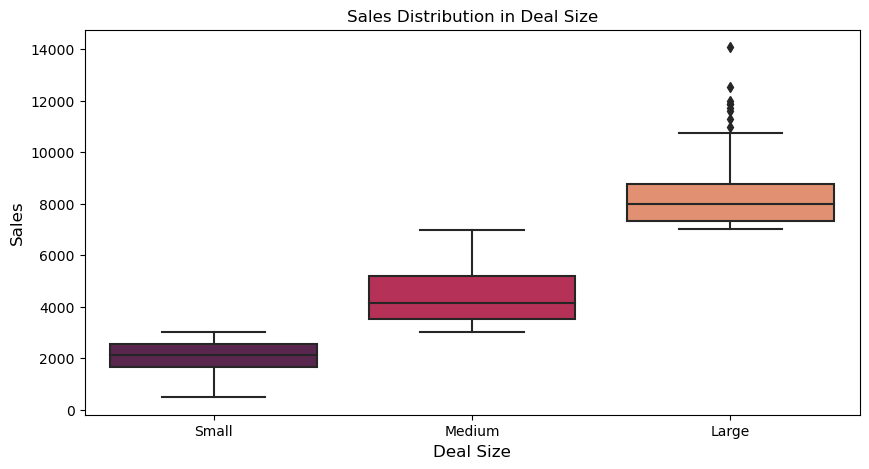

In [44]:
plt.figure(1 , figsize = (10,5))
sns.boxplot(x = 'DEALSIZE' , y = 'SALES' , data = df, palette='rocket')
plt.title('Sales Distribution in Deal Size')
plt.xlabel("Deal Size", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation = 0)
plt.show()

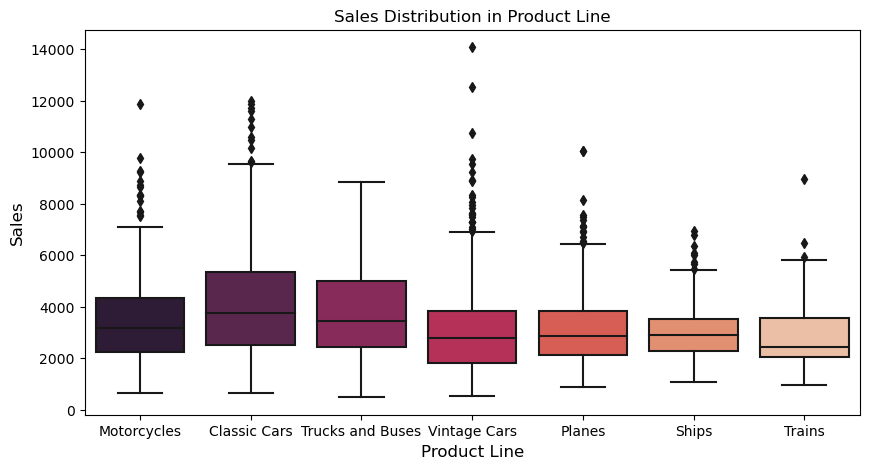

In [45]:
#Vendas de  Produtos
plt.figure(1 , figsize = (10,5))
sns.boxplot(x = 'PRODUCTLINE' , y = 'SALES' , data = df, palette='rocket')
plt.title('Sales Distribution in Product Line',fontsize=12)
plt.xlabel("Product Line", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.show()


In [46]:
# Extrai ano, mês, semana e trimestre de ORDERDATE
df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month
df['Week'] = df['ORDERDATE'].dt.isocalendar().week
df['Quarter'] = df['ORDERDATE'].dt.quarter


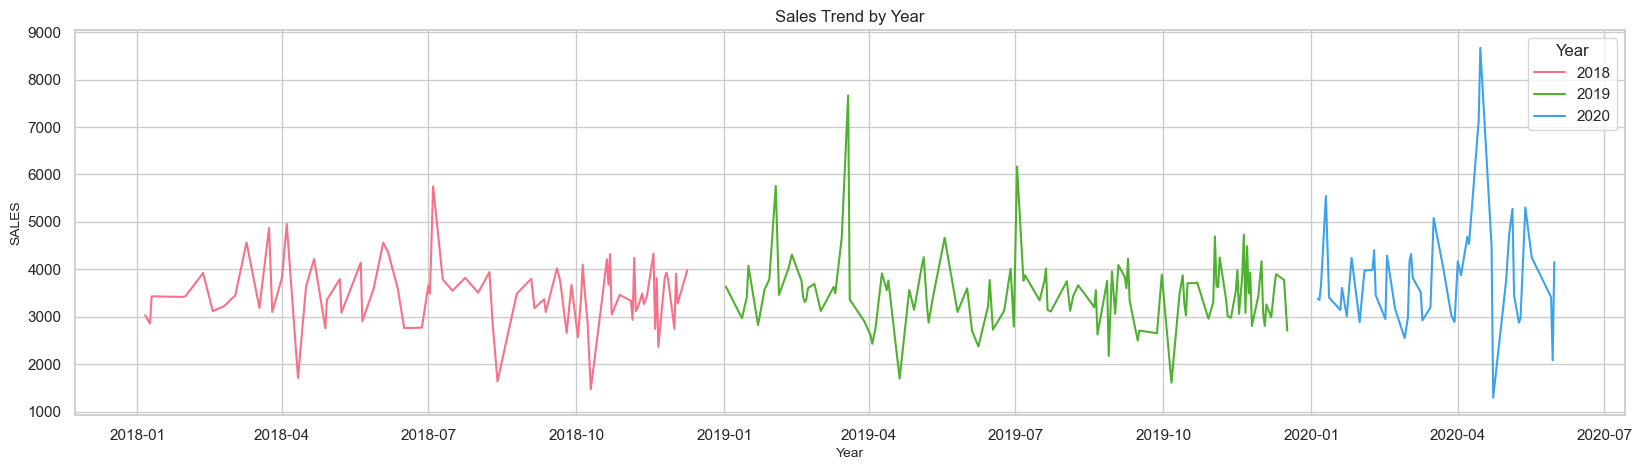

In [47]:
# Tendência de vendas por ano
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="ORDERDATE", y="SALES", ci=None, hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Year")
plt.xlabel("Year", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

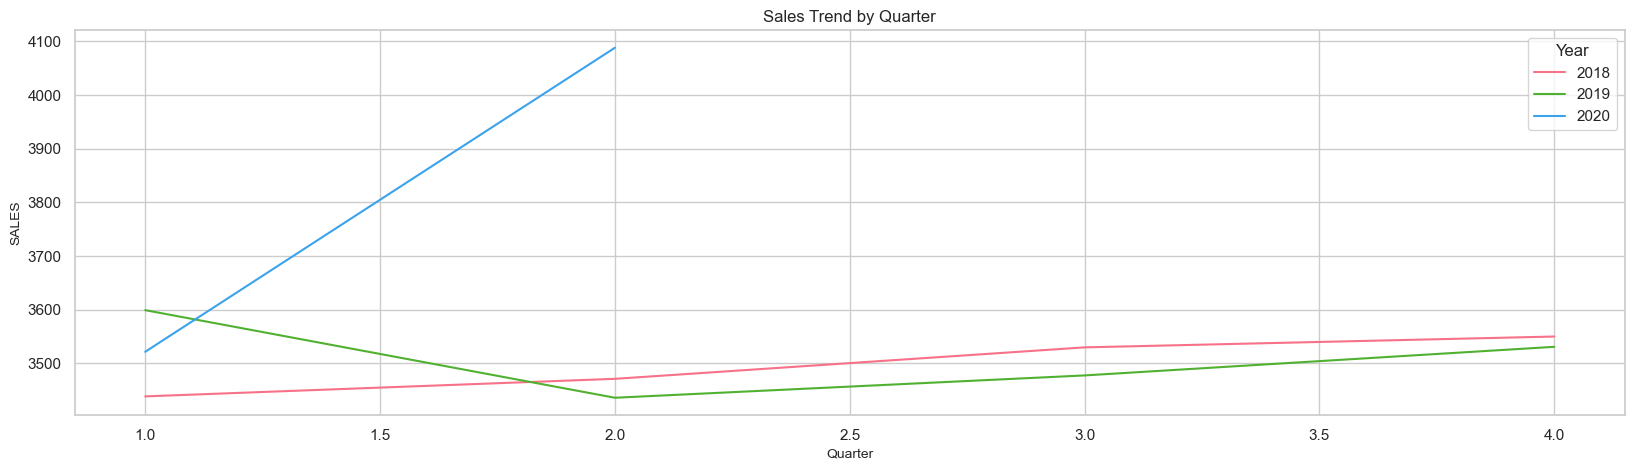

In [48]:
# Tendência de vendas por trimestre
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="Quarter", y="SALES", ci=None, hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Quarter")
plt.xlabel("Quarter", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

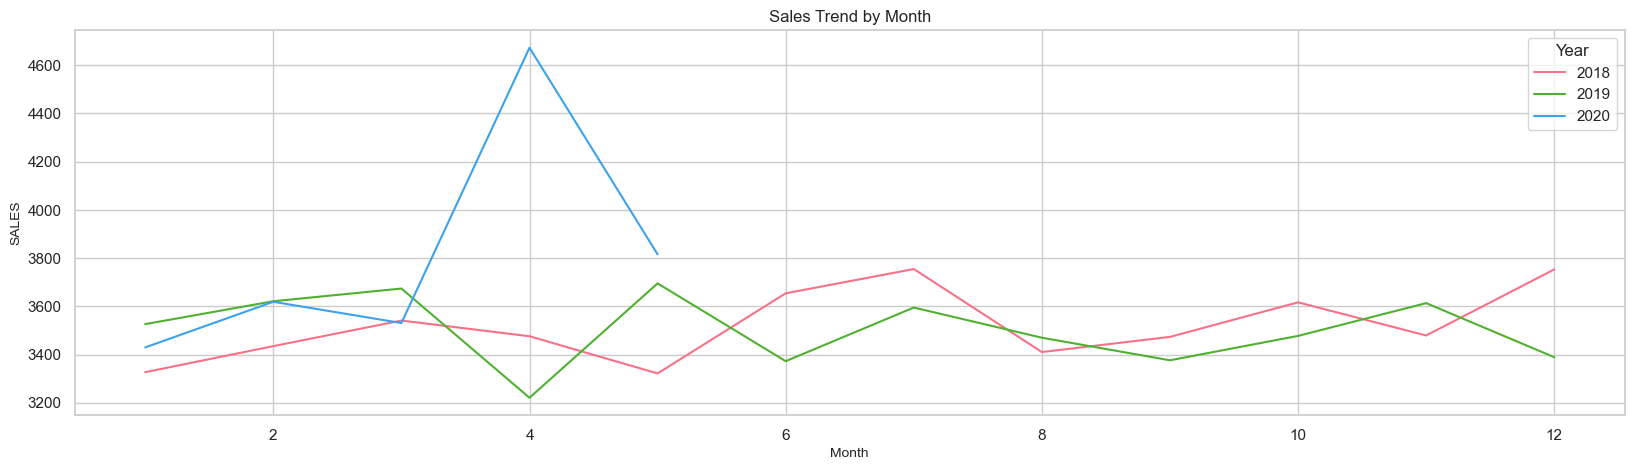

In [49]:
# Tendência de vendas por mês
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="Month", y="SALES", ci=None, hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Month")
plt.xlabel("Month", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

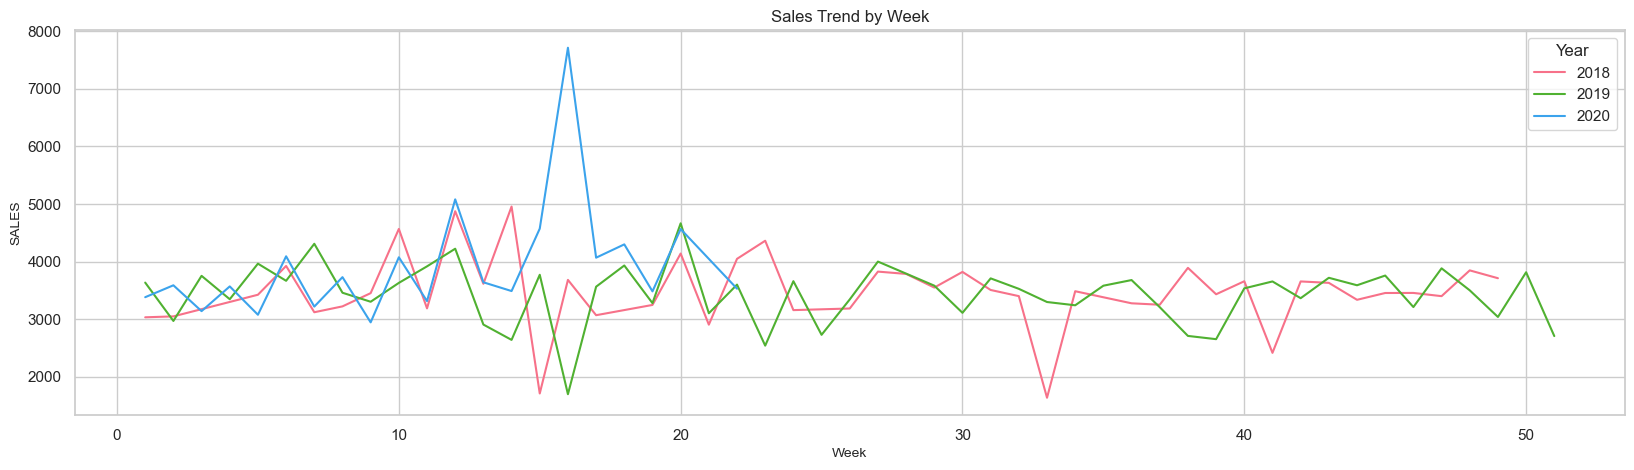

In [50]:
# Tendência de vendas por semana
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="Week", y="SALES", ci=None, hue="Year", palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Week")
plt.xlabel("Week", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

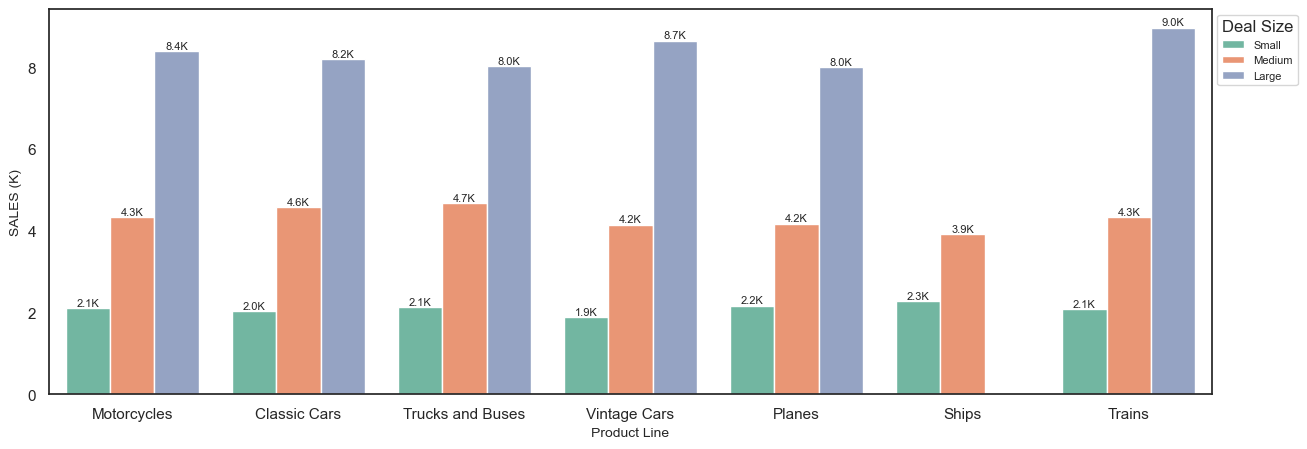

In [59]:
# Comparação entre vendas, linha de produto
sns.set(style="white", rc={"figure.figsize": (15, 5)})
df["SALES (K)"] = df["SALES"] / 1000
sns.barplot(data=df, x="PRODUCTLINE", y="SALES (K)", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("SALES (K)", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)
plt.legend(title="Deal Size", fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


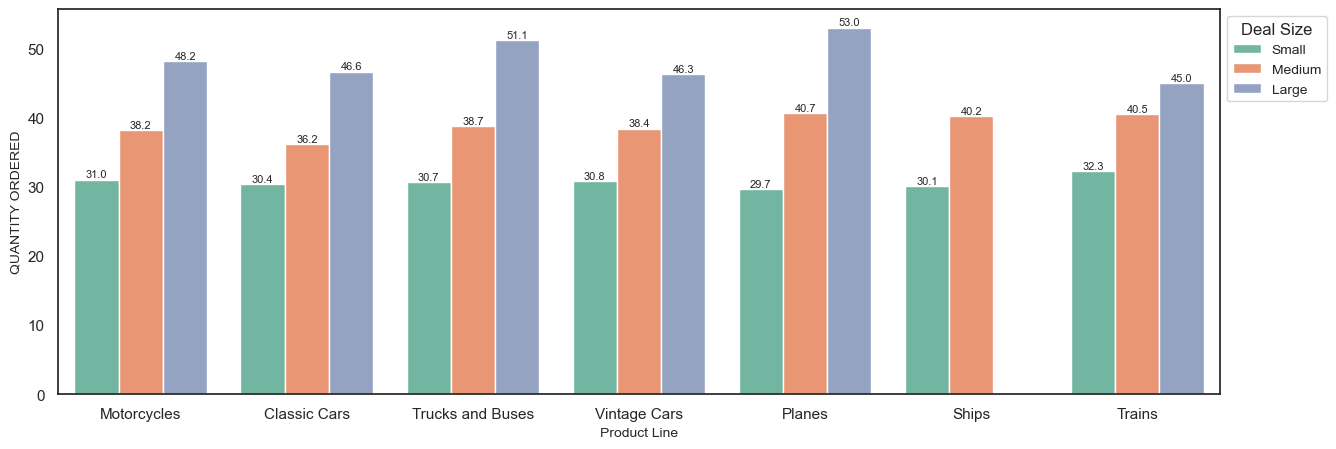

In [62]:
#Comparação entre quantidade encomendada, linha de produtos e tamanho de negócio
sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="QUANTITYORDERED", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("QUANTITY ORDERED", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size", fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

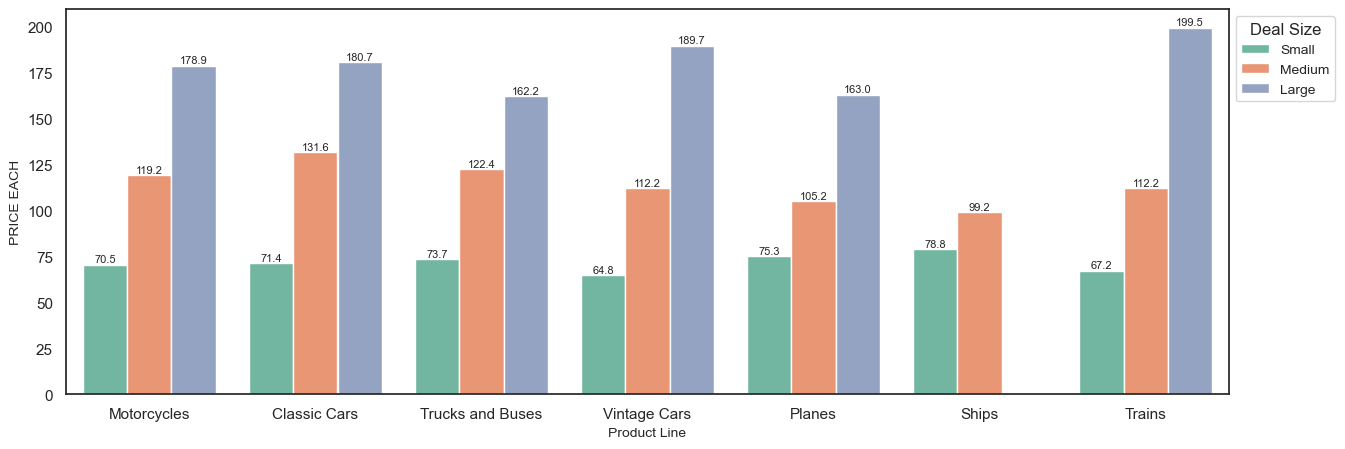

In [53]:
sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="PRICEEACH", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("PRICE EACH", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

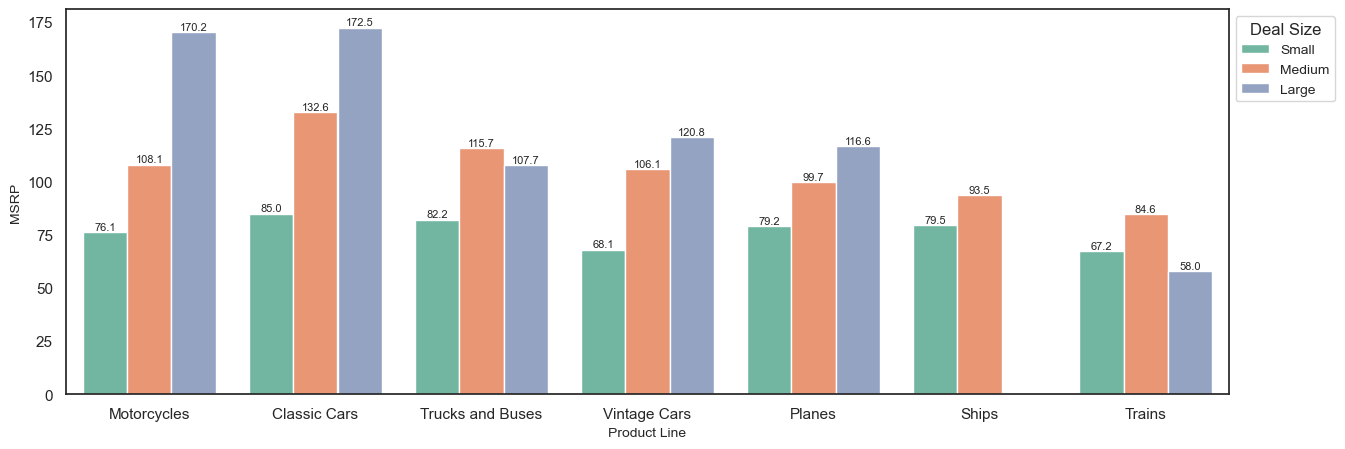

In [54]:
sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="MSRP", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("MSRP", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


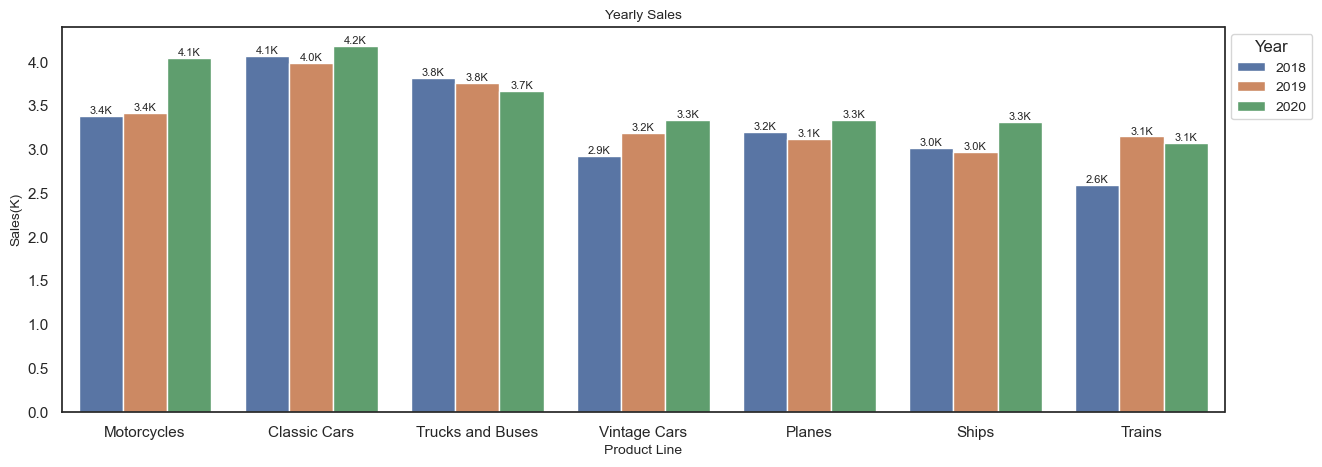

In [55]:
sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="SALES (K)", hue="Year",  ci=None)
plt.xlabel("Product Line", fontsize=10)
plt.ylabel("Sales(K)", fontsize=10)
plt.title("Yearly Sales", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Year",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

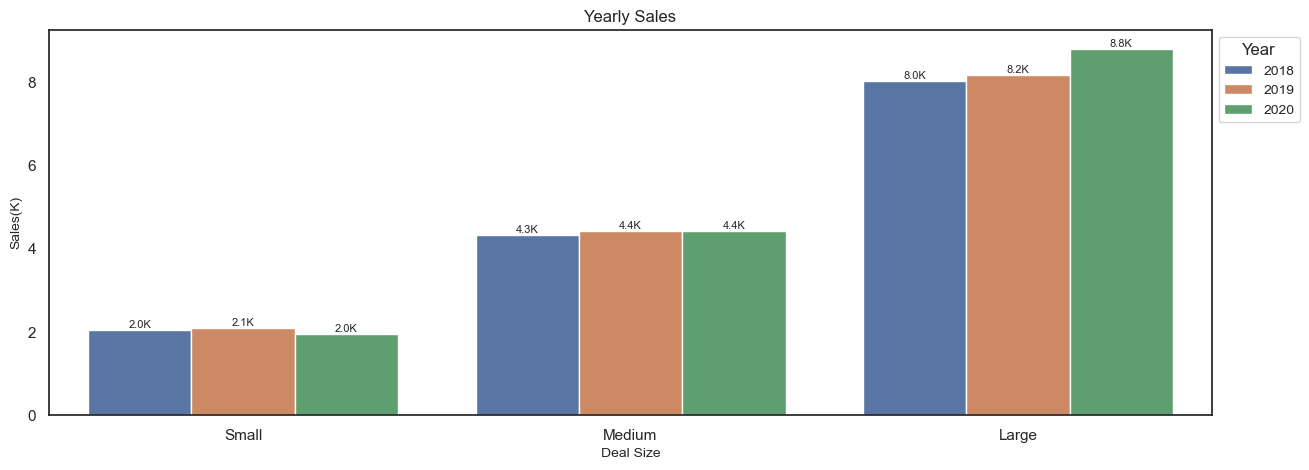

In [56]:
sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="DEALSIZE", y="SALES (K)", hue="Year",  ci=None)
plt.xlabel("Deal Size", fontsize=10)
plt.ylabel("Sales(K)", fontsize=10)
plt.title("Yearly Sales", fontsize=12)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Year",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

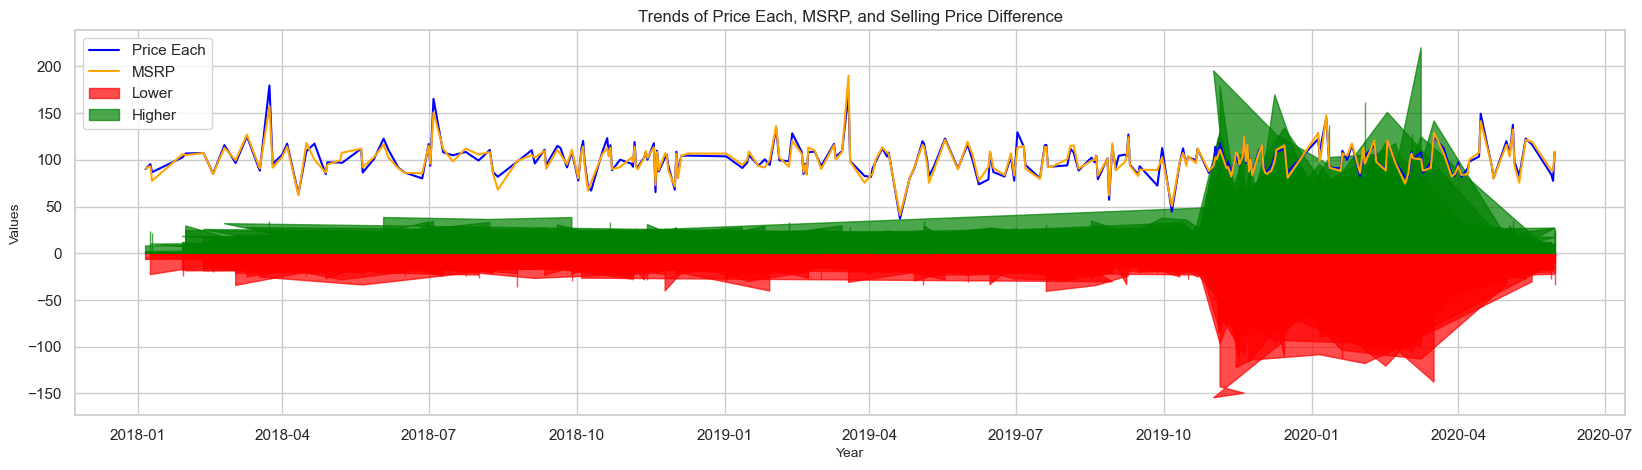

In [63]:
#Tendência de preço, MSRP e diferença de preço de venda
# A diferença de preço de venda é calculada como a diferença entre o preço sugerido de fabricação e o preço de venda
df["SELLING_PRICE_DIFF"] =  df["PRICEEACH"]-df["MSRP"]
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="ORDERDATE", y="PRICEEACH", ci=None, label="Price Each", color='blue')
sns.lineplot(data=df, x="ORDERDATE", y="MSRP", ci=None, label="MSRP", color='orange')
plt.fill_between(df["ORDERDATE"], df["SELLING_PRICE_DIFF"], where=(df["SELLING_PRICE_DIFF"] < 0), color="red", alpha=0.7, label="Lower")
plt.fill_between(df["ORDERDATE"], df["SELLING_PRICE_DIFF"], where=(df["SELLING_PRICE_DIFF"] >= 0), color="green", alpha=0.7, label="Higher")
plt.title("Trends of Price Each, MSRP, and Selling Price Difference")
plt.xlabel("Year", fontsize=10)
plt.ylabel("Values", fontsize=10)
plt.legend(loc='best')
plt.show()

### Principais insights da análise 
*Visão geral de vendas:*

298 pedidos feitos por 89 clientes de 19 países nos últimos 2,5 anos.
Os Estados Unidos lideram em vendas, seguidos por Espanha e França. Vendas notáveis ​​da Austrália e Singapura no Hemisfério Oriental.
Entre as cidades, Madri lidera as vendas, seguida por San Diego e Nova York.
No Hemisfério Oriental, as vendas da Austrália e de Singapura diminuíram, enquanto os clientes do Japão foram adicionados em 2019.
Aumento significativo nas vendas observado nos EUA e na França em 2019.
Produto e Receita:

A empresa fabrica 109 peças automotivas em 7 linhas de produtos com preços que variam de 26 a 252.
As peças de carros clássicos geram a receita máxima através das vendas (aproximadamente 40%).
Peças para carros, caminhões, ônibus e motocicletas respondem por 80% do faturamento da empresa.
Tendências de vendas:

Tendência de aumento de vendas com sazonalidade mensal. Pico de vendas em outubro e novembro anualmente.
Maiores vendas e atividade de clientes nos primeiros meses de 2020 em comparação com anos anteriores.
Preocupação

Nenhum novo cliente adicionado desde setembro de 2019.
Características da transação:

A maioria dos negócios é de médio e pequeno porte, com transações contendo normalmente de 20 a 50 itens.
Principais clientes:

Euro Shopping Channel e Mini Gifts Distribution Ltd. são os melhores clientes (gastos mais elevados, mais frequentes e recentes).
Fidelização de clientes:

Uma boa taxa de retenção de clientes de aproximadamente 90% foi observada em 2019.

